In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def cross_bilateral_filtering(img,ref,sigma_d,sigma_r,fil_size=3,padding=True,s=1):

    img = img.astype(np.float64)
    if padding:
        pad_size = fil_size//2
        img = np.pad(img,(pad_size,pad_size),mode='constant')
        ref = np.pad(ref,(pad_size,pad_size),mode='constant')

    h,w = img.shape[0],img.shape[1]
    
    rows = (h - fil_size)//s +1
    cols = (w - fil_size)//s +1
    out = np.zeros((rows,cols))
    
    x = np.power(np.arange(fil_size) - fil_size//2,2)
    y = x.copy().reshape(fil_size,1)
    d = np.zeros((fil_size,fil_size))
    d[:,:] = np.exp(-(1/(2*sigma_d*sigma_d))*(y + x))
    
    for i in range(rows):
        for j in range(cols):
            curr = ref[i:i+fil_size,j:j+fil_size]
            curr_img = img[i:i+fil_size,j:j+fil_size]
            
            #calculate the filter
            r = curr.copy()
            r = np.exp((-1/(2*sigma_r*sigma_r))*(r - r[fil_size//2,fil_size//2]))
            
            fil = np.multiply(d,r)

            out[i,j] = np.sum(np.multiply(curr_img,fil))/np.sum(fil[:,:])

            
    return out.astype(np.uint8) 

def cross_bilateral_filtering3d(img,ref,sigma_d,sigma_r,fil_size=3,padding=True,s=1):
    out = np.zeros(img.shape)
    for i in range(3):
        out[:,:,i] = cross_bilateral_filtering(img[:,:,i],ref[:,:,i],sigma_d,sigma_r,fil_size,padding,s)
    
    return out.astype(np.uint8)

In [3]:
ref = cv2.imread('../A2_resources/pots_flash.jpg')
img = cv2.imread('../A2_resources/pots_no_flash.jpg')

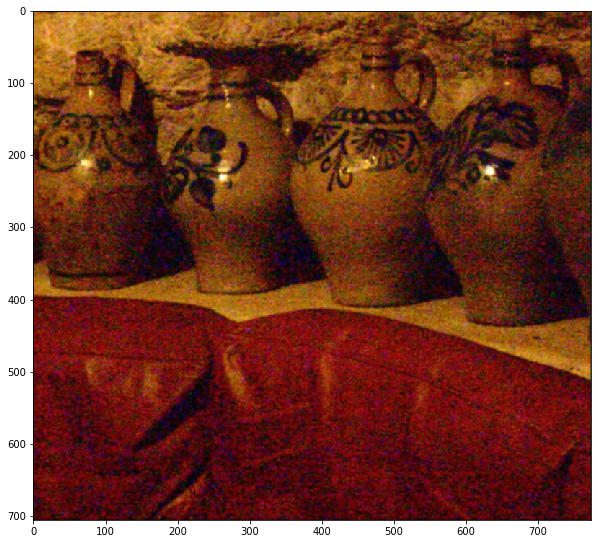

In [4]:
out = cv2.cvtColor(cross_bilateral_filtering3d(img,ref,250,250),cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(out)
plt.show()
# 2638.6761832403763

## Part-2

Inverse Bilateral Filtering:- blurs an image at edges and preserves the homogeneous region.
***Design:***


***Applications:***
+ This type of filter can be used when the image has noise similar to salt and pepper(mix of both can also be a scenario)
+ The inverse bilateral filter can be used for analyzing local contrast while removing noise and keeping homogeneous regions the same.